<a href="https://colab.research.google.com/github/Nikita-ani/Data-cleaning/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on Data preprocessing                    
######



Aim : Perform data cleaning tasks sing Python

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# importing iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##Removing duplicate entries

In [ ]:
#Checking if there are any duplicate entries
dups = df.duplicated()
print(dups.any())

True


In [ ]:
#Printing duplicates
print(df[dups])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
142                5.8               2.7                5.1               1.9


In [ ]:
#removing duplicate
print("Before removing : ",df.shape)
df.drop_duplicates(inplace = True)
print("After removing : ",df.shape)

Before removing :  (150, 4)
After removing :  (149, 4)


## Missing value replacement
####Replacing missing value with mean or mode based on trend of  distribution of data


In [ ]:
#Inserting Null values
df2 = {'sepal length (cm)':4.8,'sepal width (cm)':3.0,'petal length (cm)':1.5,'petal width (cm)':np.nan} 
df3 = {'sepal length (cm)':6.0,'sepal width (cm)':3.0,'petal length (cm)':5.0,'petal width (cm)':np.nan} 
df = df.append(df2, ignore_index = True)
df = df.append(df3, ignore_index = True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3
148,5.9,3.0,5.1,1.8
149,4.8,3.0,1.5,NaN


In [ ]:
#Finding missing value- 2 rows with missing petal width value
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     2
dtype: int64

Data visualization
#####slighty skewed to left but no outliers so mean subsitution is suitable

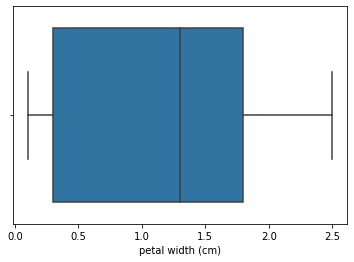

In [ ]:
#Visualizing petal width
ax = sns.boxplot(x=df["petal width (cm)"])

In [ ]:
#Replacing with mean
df['petal width (cm)'] = df['petal width (cm)'].fillna(df['petal width (cm)'].mean())
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.200000
1,4.9,3.0,1.4,0.200000
2,4.7,3.2,1.3,0.200000
3,4.6,3.1,1.5,0.200000
4,5.0,3.6,1.4,0.200000
...,...,...,...,...
146,6.5,3.0,5.2,2.000000
147,6.2,3.4,5.4,2.300000
148,5.9,3.0,5.1,1.800000
149,4.8,3.0,1.5,1.194631


## Data transformation from numeric to categorical
####discretization using binning

In [ ]:
df_new = df.rename(columns={'sepal length (cm)': 'sepal_length'})
df_new.head()

,sepal_length,sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Creating categories from sepal length
sepal_length_ranges = ["[{0}-{1})".format(sepal_length,sepal_length + 1.0) for sepal_length in range(4,8,1)]
sepal_length_ranges

['[4-5.0)', '[5-6.0)', '[6-7.0)', '[7-8.0)']

In [ ]:
#Count of bins
count_sepal_length_ranges = len(sepal_length_ranges)
count_sepal_length_ranges

4

In [ ]:
#Using cut method of pandas lib to create bins
df_new['sepal_length_ranges'] = pd.cut(x=df_new['sepal_length'], bins=count_sepal_length_ranges, labels=sepal_length_ranges)
df_new.head()

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),sepal_length_ranges
0,5.1,3.5,1.4,0.2,[4-5.0)
1,4.9,3.0,1.4,0.2,[4-5.0)
2,4.7,3.2,1.3,0.2,[4-5.0)
3,4.6,3.1,1.5,0.2,[4-5.0)
4,5.0,3.6,1.4,0.2,[4-5.0)


In [ ]:
#Calculating no of entries in each category
sepal_len_hist_df=df_new['sepal_length_ranges'].value_counts()
sepal_len_hist_df

[5-6.0)    50
[4-5.0)    46
[6-7.0)    43
[7-8.0)    12
Name: sepal_length_ranges, dtype: int64

In [ ]:
#Converting series obgect to dataframe to display graph
df_ranges_hist = pd.DataFrame(sepal_len_hist_df).reset_index()
df_ranges_hist.columns = ['sepal_length_ranges','count']
df_ranges_hist

,sepal_length_ranges,count
0,[5-6.0),50
1,[4-5.0),46
2,[6-7.0),43
3,[7-8.0),12


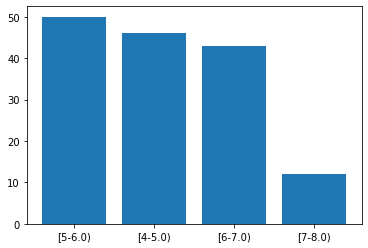

In [ ]:
#Bar graph of bin values- converted to 4 categories
plt.bar(df_ranges_hist["sepal_length_ranges"],df_ranges_hist["count"])
plt.show()

## Prediction
####predicting the optimum number of clusters using K-Means algorithm for clustering.

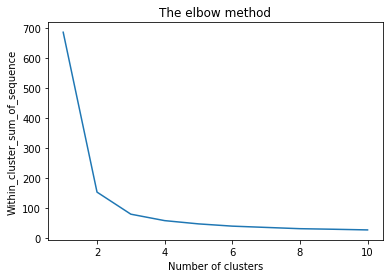

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting resultant graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within_cluster_sum_of_sequence') 
plt.show()

In [ ]:
# Creating the kmeans classifier
kmeans= KMeans(n_clusters=3, init= 'k-means++',max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

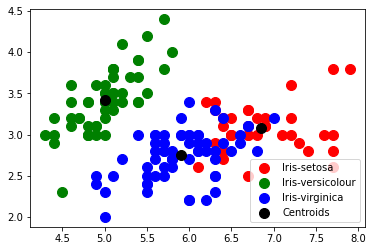

In [ ]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

####Conclusion: Successfully performed data preprocessing techniques on iris dataframe